In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:174: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-112)),
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:53: RuntimeWarning: divide by zero encountered in log10
  self.precision = int(-log10(self.eps))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:54: RuntimeWarning: divide by zero encountered in power
  self.resolution = float_to_float(float_conv(10) ** (-self.precision))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:186: RuntimeWarning: divide by zero encountered in exp2
  epsneg_f80 = exp2(ld(-64))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:187: RuntimeWarning: divide by zero encountered in exp2
  tiny_f80 = exp2(ld(-16382))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\getlimits.py:201: RuntimeWarning: divide by zero encountered in exp2
  eps=exp2(ld(-63)),
C:\Users\tmhab\anaconda3\lib\site-packages\nump

## Import Files From Simulation:

## Our Approach to Calculating Percolation Paths Through a Polymer Membrane:

### Defining The System:

In our system we have random copolymers with solvent molecules. Polymers are represented by beads of types 1 and 2 and solvent molecules are individual beads of type 0. No bead can overlap another. 

### Defining Percolation:

A percolation is a pathway through the polymer network that solvent molecules can move through. To form a percolation a solvent molecule will need to have at least one other solvent molecule adjacent to it within some path radius $r$

### What are we trying to learn from the system:

The goal in developing this code is to determine quantitatively the amount of percolation in a membrane. 

### Models for Percolation:
**1. Fire Spread Model:** In this model we measure the percolation paths by tracing the spots where the solvent molecules continue to be adjacent to the previous... It's easier to explain with a picture

## What we need to calculate:

Starting with the final equilibrium state we have x,y,z postion of a bead and it's identity (and also methylation state). We want to calculate percolation paths which will be represented by root mean square. 

#### What Percolation Model do we want to use:

1. Fire spead model:

Proceedure:
1. Pick a bead type
2. pick a random bead of that bead type
3. Check surround bead types to see if they are the same
    a. Pick a radius to search in


In [2]:
def generate_test_data(length=10,width=10,height=10,datapoints=50):
    X = np.random.random(datapoints)*length
    Y = np.random.random(datapoints)*width
    Z = np.random.random(datapoints)*height
    Beads = np.random.randint(3,size=(datapoints)).astype('uint8')
    Beads
    return X,Y,Z,Beads

generate_test_data()

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in multiply
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in multiply
  after removing the cwd from sys.path.
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:885: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:888: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(f

(array([6.10086025, 0.7573052 , 1.25274179, 2.80340794, 4.54946644,
        8.08711576, 8.84428513, 4.49968467, 1.51142753, 5.94268699,
        2.99026734, 4.49187527, 5.37121702, 3.86227535, 9.5220563 ,
        6.93082559, 8.44904233, 1.34816015, 4.96999322, 9.62019095,
        1.88040855, 5.44909089, 2.13631465, 5.02205237, 8.33916756,
        4.41366843, 3.83791796, 5.03015717, 7.17023961, 6.2170653 ,
        4.24760913, 4.86884245, 5.84789811, 1.57741087, 5.17750413,
        8.47411504, 4.35140528, 4.85998911, 1.36689031, 3.03209995,
        5.82623027, 5.78816853, 7.81631383, 5.38930825, 3.79118062,
        0.45370662, 8.06579219, 6.53424554, 0.75993875, 0.51847595]),
 array([3.99193013, 5.17936671, 5.67800368, 4.35845234, 5.48713131,
        7.44505042, 4.98148373, 1.60951026, 8.17744791, 2.10266585,
        1.82673659, 7.19037428, 7.74691967, 4.96255242, 0.34329657,
        3.81804244, 3.8727919 , 5.34409939, 3.30481105, 6.57584493,
        2.21341223, 1.34678397, 0.60648809, 9.

In [3]:
class Bead:
    def __init__(self, x, y, z, bead_type):
        self.x = x
        self.y = y
        self.z = z
        self.bead_type = bead_type
        


In [4]:
class PolymerNetwork:
    """
    This represents the postions of bead and their type (time invariant)
    
    Parameters
    ----------
    X : float [array] X 
    """
    
    def __init__(self,X,Y,Z, Beads, bead_list=[]):
        self.X = X
        self.Y = Y
        self.Z = Z
        self.Beads = Beads
        self.bead_list = bead_list
        
        self.density = Beads.shape[0]/((max(X)-min(X)) * (max(Y)-min(Y)) * (max(Z)-min(Z)))
        
    def visualize(self):
        fig = plt.figure()
        ax = plt.axes(projection='3d')
        ax.scatter3D(self.X[Beads==0], self.Y[Beads==0], self.Z[Beads==0],color='y')
        ax.scatter3D(self.X[Beads==1], self.Y[Beads==1], self.Z[Beads==1],color='r')
        ax.scatter3D(self.X[Beads==2], self.Y[Beads==2], self.Z[Beads==2],color='b')
        
    def nearest_neighbor(self,bead_num,radius):
        '''
        Find the average number of beads that surround a bead of the same type within the radius specified
        '''
        X_bead = self.X[Beads==bead_num]
        Y_bead = self.Y[Beads==bead_num]
        Z_bead = self.Z[Beads==bead_num]
        
        total_neighbors = 0
        for i in range(Beads[Beads==bead_num].shape[0]):
            point = np.array([X_bead[i],Y_bead[i],Z_bead[i]])
            displacement = np.sqrt((X_bead - point[0])**2 + (Y_bead - point[1])**2 + (Z_bead - point[2])**2)
            num_neighbor_points = displacement[displacement<=radius].shape[0] -1
            
            total_neighbors += num_neighbor_points

        return total_neighbors/(i+1)
    def create_beads(self):
        for i in range(len(self.X)):
            bead = Bead(self.X[i], self.Y[i], self.Z[i], self.Beads[i])
            self.bead_list.append(bead)
    
    def print_bead_list(self):
        for i, bead in enumerate(self.bead_list):
            print("Bead " + str(i) + ": " + str(bead.x) + ", " + str(bead.y) + ", " + str(bead.z))


In [5]:
X,Y,Z,Beads = generate_test_data()
PNet_Test = PolymerNetwork(X,Y,Z,Beads)

#PNet_Test.density

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in multiply
  
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in multiply
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in multiply
  after removing the cwd from sys.path.
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:17: RuntimeWarning: divide by zero encountered in double_scalars


0.053864666536692266

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\figure.py:348: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(figsize).all():
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\gridspec.py:136: RuntimeWarning: divide by zero encountered in subtract
  fig_tops, fig_bottoms = (top - cell_hs).reshape((-1, 2)).T
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\gridspec.py:137: RuntimeWarning: divide by zero encountered in add
  fig_lefts, fig_rights = (left + cell_ws).reshape((-1, 2)).T
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:34: RuntimeWarning: divide by zero encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:30: RuntimeWarning: divide by zero encount

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\ticker.py:2045: RuntimeWarning: divide by zero encountered in greater_equal
  istep = np.nonzero(steps >= raw_step)[0][0]
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\ticker.py:2057: RuntimeWarning: divide by zero encountered in int_scalars
  for istep in reversed(range(istep + 1)):
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\ticker.py:2063: RuntimeWarning: divide by zero encountered in double_scalars
  best_vmin = (_vmin // step) * step
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\ticker.py:2070: RuntimeWarning: divide by zero encountered in double_scalars
  low = edge.le(_vmin - best_vmin)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\ticker.py:1872: RuntimeWarning: divide by zero encountered in double_scalars
  d, m = divmod(x, self.step)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\ticker.py:1873: RuntimeWarning: divide by zero encountered in double_scalars
  if self.closeto(m / self.

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:191: RuntimeWarning: divide by zero encountered in double_scalars
  font, np.round(x - xd + xo), np.round(y + yd + yo) + 1, angle, gc)
C:\Users\tmhab\anaconda3\lib\site-packages\mpl_toolkits\mplot3d\axis3d.py:31: RuntimeWarning: divide by zero encountered in double_scalars
  coord[i] += deltas[i]
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2257: RuntimeWarning: divide by zero encountered in isfinite
  xfin = isfinite(x)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2258: RuntimeWarning: divide by zero encountered in isfinite
  yfin = isfinite(y)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in subtract
  return less_equal(abs(x-y), atol + rtol * abs(y))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in absolute
  return less_equal(abs(x-

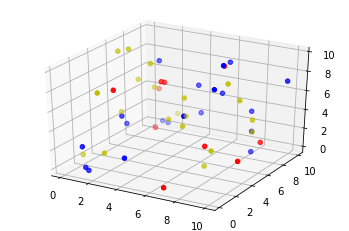

In [6]:
#PNet_Test.visualize()

In [7]:
#PNet_Test.nearest_neighbor(bead_num=0,radius=0.4)

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in subtract
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in square
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in add
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in sqrt
C:\Users\tmhab\anaconda3\lib\si

0.0

In [8]:

PNet_Test.create_beads()
PNet_Test.print_bead_list()


Bead 0: 7.322020625990106, 4.112705134822967, 0.32936840516717636
Bead 1: 6.370986847724276, 3.310392475666346, 5.709691774652772
Bead 2: 2.152023665035597, 9.789302611733518, 1.5528103582674768
Bead 3: 4.164266495584599, 8.906514058370592, 5.608933499201112
Bead 4: 1.3394457407959637, 8.32953668553904, 4.907882863387051
Bead 5: 8.546390784806032, 2.7530649114329675, 3.0360684829552245
Bead 6: 1.3668943176489745, 0.24421462423749762, 0.4575609258691882
Bead 7: 9.931234780179455, 9.526387200341741, 7.2827064101789505
Bead 8: 4.055769472186627, 5.439806751721779, 3.6560583096687074
Bead 9: 3.7279374863494965, 8.140974665350011, 2.5426850052473227
Bead 10: 2.904807690360869, 6.922608913302022, 6.513020470201836
Bead 11: 1.485231037996958, 0.3850259070281137, 0.09655275054155976
Bead 12: 5.80526075594395, 9.169420981338966, 7.900313118762378
Bead 13: 1.0533771250965107, 9.343613201879617, 4.202076084479117
Bead 14: 4.862630709489589, 5.940503487815738, 5.867026507275828
Bead 15: 0.47698774

C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\function_base.py:129: RuntimeWarning: divide by zero encountered in multiply
  start = asanyarray(start) * 1.0
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\function_base.py:130: RuntimeWarning: divide by zero encountered in multiply
  stop  = asanyarray(stop)  * 1.0
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\function_base.py:136: RuntimeWarning: divide by zero encountered in double_scalars
  delta = stop - start
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\function_base.py:143: RuntimeWarning: divide by zero encountered in double_scalars
  step = delta / div
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\function_base.py:153: RuntimeWarning: divide by zero encountered in multiply
  y *= step
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\function_base.py:163: RuntimeWarning: divide by zero encountered in add
  y += start
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:30: R

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2434: RuntimeWarning: divide by zero encountered in isfinite
  finite_dl = [d for d in dl if np.isfinite(d).all()]
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2439: RuntimeWarning: divide by zero encountered in isfinite
  if (np.isfinite(d.intervalx).all() and
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2442: RuntimeWarning: divide by zero encountered in isfinite
  if (np.isfinite(d.intervaly).all() and
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2452: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(bb.intervalx).all():
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2455: RuntimeWarning: divide by zero encountered in isfinite
  if n

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in subtract
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in square
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in add
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in sqrt
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in less_equal
C:\Users\tmhab\anaconda3\l

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in subtract
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in square
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in add
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in sqrt
C:\Users\tmhab\anaconda3\lib\si

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1938: RuntimeWarning: divide by zero encountered in deg2rad
  return self.rotate(np.deg2rad(degrees))
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1922: RuntimeWarning: divide by zero encountered in cos
  a = np.cos(theta)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1923: RuntimeWarning: divide by zero encountered in sin
  b = np.sin(theta)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1693: RuntimeWarning: divide by zero encountered in equal
  return np.all(self.get_matrix() == other.get_matrix())
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2434: RuntimeWarning: divide by zero encountered in isfinite
  finite_dl = [d for d in dl if np.isfinite(d).all()]
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Us

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in subtract
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in square
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in add
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in sqrt
C:\Users\tmhab\anaconda3\lib\si

C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1938: RuntimeWarning: divide by zero encountered in deg2rad
  return self.rotate(np.deg2rad(degrees))
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1922: RuntimeWarning: divide by zero encountered in cos
  a = np.cos(theta)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1923: RuntimeWarning: divide by zero encountered in sin
  b = np.sin(theta)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1693: RuntimeWarning: divide by zero encountered in equal
  return np.all(self.get_matrix() == other.get_matrix())
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2434: RuntimeWarning: divide by zero encountered in isfinite
  finite_dl = [d for d in dl if np.isfinite(d

C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2258: RuntimeWarning: divide by zero encountered in isfinite
  yfin = isfinite(y)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in subtract
  return less_equal(abs(x-y), atol + rtol * abs(y))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in absolute
  return less_equal(abs(x-y), atol + rtol * abs(y))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in multiply
  return less_equal(abs(x-y), atol + rtol * abs(y))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in add
  return less_equal(abs(x-y), atol + rtol * abs(y))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in less_equal
  return less_equa

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:2828: RuntimeWarning: divide by zero encountered in double_scalars
  if maxabsvalue < (1e6 / tiny) * np.finfo(float).tiny:
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: divide by zero encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2257: RuntimeWarning: divide by zero encountered in isfinite
  xfin = isfinite(x)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2258: RuntimeWarning: divide by zero encountered in isfinite
  yfin = isfinite(y)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in subtract
  return less_equal(abs(x-y), atol + rtol * abs(y))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in absolute
  return less_equal(abs(x-y), atol

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:30: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in subtract
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in square
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in add
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in sqrt
C:\Users\tmhab\anaconda3\lib\si

C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: divide by zero encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1938: RuntimeWarning: divide by zero encountered in deg2rad
  return self.rotate(np.deg2rad(degrees))
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1922: RuntimeWarning: divide by zero encountered in cos
  a = np.cos(theta)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1923: RuntimeWarning: divide by zero encountered in sin
  b = np.sin(theta)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1693: RuntimeWarning: divide by zero encountered in equal
  return np.all(self.get_matrix() == other.get_matrix())
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2434: RuntimeWarning: divide by zero encountered in isfinite
  finite_dl = [d for d in dl if np.isfinite(d

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2452: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(bb.intervalx).all():
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2455: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(bb.intervaly).all():
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:2819: RuntimeWarning: divide by zero encountered in isfinite
  if (not np.isfinite(vmin)) or (not np.isfinite(vmax)):
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:2828: RuntimeWarning: divide by zero encountered in double_scalars
  if maxabsvalue < (1e6 / tiny) * np.finfo(float).tiny:
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: divide by zero encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2257: RuntimeWarning: divide by zero en

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in subtract
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in square
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in add
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in sqrt
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in less_equal
C:\Users\tmhab\anaconda3\l

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: divide by zero encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2257: RuntimeWarning: divide by zero encountered in isfinite
  xfin = isfinite(x)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2258: RuntimeWarning: divide by zero encountered in isfinite
  yfin = isfinite(y)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in subtract
  return less_equal(abs(x-y), atol + rtol * abs(y))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in absolute
  return less_equal(abs(x-y), atol + rtol * abs(y))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2246: RuntimeWarning: divide by zero encountered in multiply
  return less_equal(abs(x-y), atol + rtol * abs

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:31: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in equal
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in subtract
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in square
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in add
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:37: RuntimeWarning: divide by zero encountered in sqrt
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:38: RuntimeWarning: divide by zero encountered in less_equal
C:\Users\tmhab\anaconda3\l

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2452: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(bb.intervalx).all():
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2455: RuntimeWarning: divide by zero encountered in isfinite
  if not np.isfinite(bb.intervaly).all():
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:2819: RuntimeWarning: divide by zero encountered in isfinite
  if (not np.isfinite(vmin)) or (not np.isfinite(vmax)):
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:2828: RuntimeWarning: divide by zero encountered in double_scalars
  if maxabsvalue < (1e6 / tiny) * np.finfo(float).tiny:
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:2832: RuntimeWarning: divide by zero encountered in double_scalars
  elif vmax - vmin <= maxabsvalue * tiny:
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\numeric.py:2257: RuntimeWarning: divide by zero en

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:1693: RuntimeWarning: divide by zero encountered in equal
  return np.all(self.get_matrix() == other.get_matrix())
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2434: RuntimeWarning: divide by zero encountered in isfinite
  finite_dl = [d for d in dl if np.isfinite(d).all()]
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:48: RuntimeWarning: divide by zero encountered in reduce
  return umr_all(a, axis, dtype, out, keepdims)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2439: RuntimeWarning: divide by zero encountered in isfinite
  if (np.isfinite(d.intervalx).all() and
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2442: RuntimeWarning: divide by zero encountered in isfinite
  if (np.isfinite(d.intervaly).all() and
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2452: RuntimeWarning: divide by zero encountered in isf

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2476: RuntimeWarning: divide by zero encountered in isfinite
  if np.isfinite(x1t) and np.isfinite(x0t):
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2477: RuntimeWarning: divide by zero encountered in double_scalars
  delta = (x1t - x0t) * margin
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2483: RuntimeWarning: divide by zero encountered in double_scalars
  x0t -= delta
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:2485: RuntimeWarning: divide by zero encountered in double_scalars
  x1t += delta
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axes\_base.py:3157: RuntimeWarning: divide by zero encountered in isfinite
  and not np.isfinite(converted_limit)):


Text(0, 0.5, 'Average Number of Neighbor Points')

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:417: RuntimeWarning: divide by zero encountered in double_scalars
  return (x0, y0, x1 - x0, y1 - y0)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axis.py:2182: RuntimeWarning: divide by zero encountered in double_scalars
  length = ((ends[1][0] - ends[0][0]) / self.axes.figure.dpi) * 72
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axis.py:2188: RuntimeWarning: divide by zero encountered in double_scalars
  return int(np.floor(length / size))
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\axis.py:2188: RuntimeWarning: divide by zero encountered in floor
  return int(np.floor(length / size))
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:69: RuntimeWarning: divide by zero encountered in isnan
  return um.isnan(a)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: divide by zero encountered in clip
  return ufunc(*args, out=out, **kwargs)
C:\U

C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:399: RuntimeWarning: divide by zero encountered in double_scalars
  return points[1, 0] - points[0, 0]
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:405: RuntimeWarning: divide by zero encountered in double_scalars
  return points[1, 1] - points[0, 1]
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:714: RuntimeWarning: divide by zero encountered in maximum
  x0 = np.maximum(bbox1.xmin, bbox2.xmin)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:715: RuntimeWarning: divide by zero encountered in minimum
  x1 = np.minimum(bbox1.xmax, bbox2.xmax)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:716: RuntimeWarning: divide by zero encountered in maximum
  y0 = np.maximum(bbox1.ymin, bbox2.ymin)
C:\Users\tmhab\anaconda3\lib\site-packages\matplotlib\transforms.py:717: RuntimeWarning: divide by zero encountered in minimum
  y1 = np.minimum(bbox1.

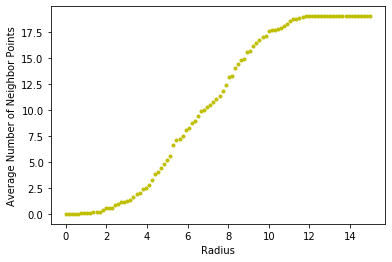

In [9]:
radii = np.linspace(0,15,100)
for r in radii:
    plt.plot(r,PNet_Test.nearest_neighbor(bead_num=0,radius=r),'y.')
plt.xlabel('Radius')
plt.ylabel('Average Number of Neighbor Points')

In [10]:
x = np.array([0, 1, 2])
y = np.array([4, 5, 6])
z = (x-y)
np.sum(z**2)
np.average(y)

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in square
  after removing the cwd from sys.path.
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:151: RuntimeWarning: divide by zero encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: divide by zero encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


5.0

In [15]:
'''
Determine the mean square interbead distance
Input: PolymerNetwork
Return: mean square distance b/w beads (?? issue w/ beads not on polymer chains)
'''
def r2(polymer_network):
    number_beads = len(polymer_network.bead_list)
    bead_dist = np.zeros((number_beads, number_beads))
    for i, bead1 in enumerate(polymer_network.bead_list):
        for j, bead2 in enumerate(polymer_network.bead_list):
            position1 = np.array([bead1.x, bead1.y, bead1.z])
            position2 = np.array([bead2.x, bead2.y, bead2.z])
            displacement_squared = np.sum((position2 - position1)**2)
            bead_dist[i][j] = displacement_squared
            
    print(bead_dist)
    #get diagonals, average them
    num_diagonals = (number_beads * 2) - 1
    n_jump_dist_avg = np.zeros(num_diagonals)
    for d in range(num_diagonals):
        diag = np.diag(bead_dist, d)
        n_jump_dist_avg[d] = np.average(diag)    # populated with average displacements of d jumps
    avg_r2_diagonal = np.average(n_jump_dist_avg)
    
    #alternative, not using the diagonals 
    avg_r2 = np.average(bead_dist)
    return avg_r2
    

In [16]:
x = r2(PNet_Test)
print(x)

C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in subtract
  del sys.path[0]
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in subtract
  del sys.path[0]
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in square
  del sys.path[0]
C:\Users\tmhab\anaconda3\lib\site-packages\ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in square
  del sys.path[0]
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:90: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


[[ 0.         30.49605041 60.4494377  ... 15.56103282 93.9290094
  62.71847887]
 [30.49605041  0.         77.05559    ...  5.08271263 47.43402092
  15.12127033]
 [60.4494377  77.05559     0.         ... 46.4853776  56.29132546
  84.86734876]
 ...
 [15.56103282  5.08271263 46.4853776  ...  0.         46.1170525
  23.99645394]
 [93.9290094  47.43402092 56.29132546 ... 46.1170525   0.
  16.1447057 ]
 [62.71847887 15.12127033 84.86734876 ... 23.99645394 16.1447057
   0.        ]]
53.811740505935674


C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:885: RuntimeWarning: divide by zero encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:885: RuntimeWarning: invalid value encountered in isfinite
  finite_vals = data[isfinite(data)]
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:888: RuntimeWarning: divide by zero encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:888: RuntimeWarning: invalid value encountered in not_equal
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:888: RuntimeWarning: divide by zero encountered in absolute
  abs_non_zero = absolute(finite_vals[finite_vals != 0])
C:\Users\tmhab\anaconda3\lib\site-packages\numpy\core\arrayprint.py:888: RuntimeWarning: invalid value encountered 